Weekly_sums
[1315.8593014712073, 1008.093839740925, 1053.7940580470884, 1018.7480989177154, 922.0196714312912, 982.4364739107695, 1080.4058114680104, 1181.9518351890524, 1103.9303050531316, 1138.6105295970995, 1091.7780816793354, 1091.0160725263424, 962.2991744751135, 1038.6785250591936, 1195.5470058826272, 1139.798900093033, 1186.6833669823475, 1258.7104983833551]


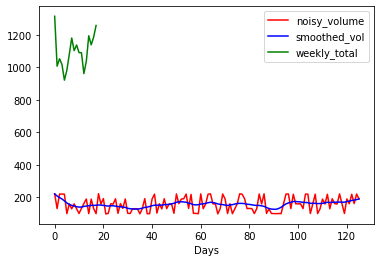

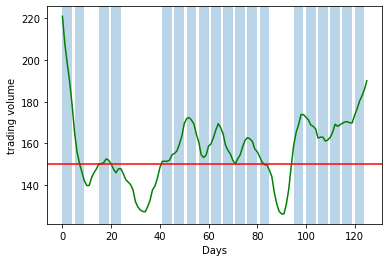

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.signal as signal


trading_volume=100+30*np.random.randint(0,5,126)
noise=np.random.normal(0,1,126)
noisy_volume=trading_volume+noise

window_size=7
b=np.ones(window_size)/window_size
smoothed_vol=signal.filtfilt(b,1,noisy_volume)

weekly_vol=smoothed_vol.reshape(-1,7)
weekly_total=[]
for week in weekly_vol:
    s=np.sum(week)
    weekly_total.append(s)

print("Weekly_sums")
print(weekly_total)


plt.plot(noisy_volume,color='r',label='noisy_volume')
plt.plot(smoothed_vol,color='b',label='smoothed_vol')
plt.plot(weekly_total,color='g',label='weekly_total')
plt.xlabel("Days")
plt.legend()
plt.show()

exceeded_volume=smoothed_vol>150

exceeded_intervals=[]
start=-1
for i in range (0,len(exceeded_volume)):
    if start==-1 and exceeded_volume[i]:
        start=i
    else:
        if start!=-1 and i-start>3:
            exceeded_intervals.append((start,i))
            start=-1

for start,end in exceeded_intervals:
    plt.axvspan(start,end,alpha=0.3)
plt.plot(smoothed_vol,color='g',label='smoothe_vol')
plt.axhline(y=150,color='r')
plt.ylabel("trading volume")
plt.xlabel("Days")
plt.show()
            
